[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cyneuro/Neural-Networks-Machine-Learning/blob/master/XOR_notebooks/xor_network_plot.ipynb)

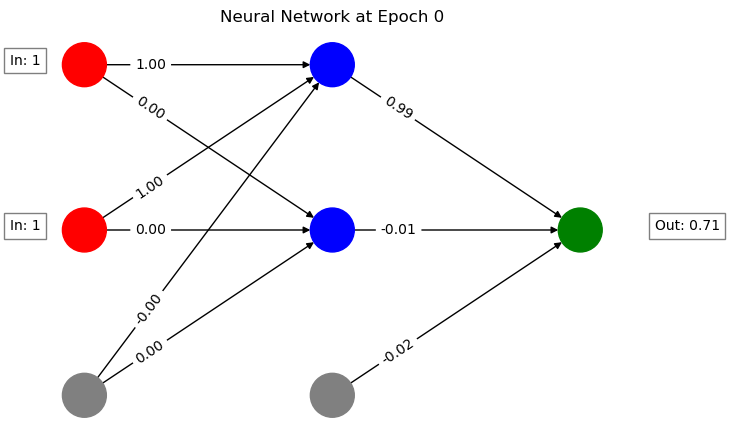

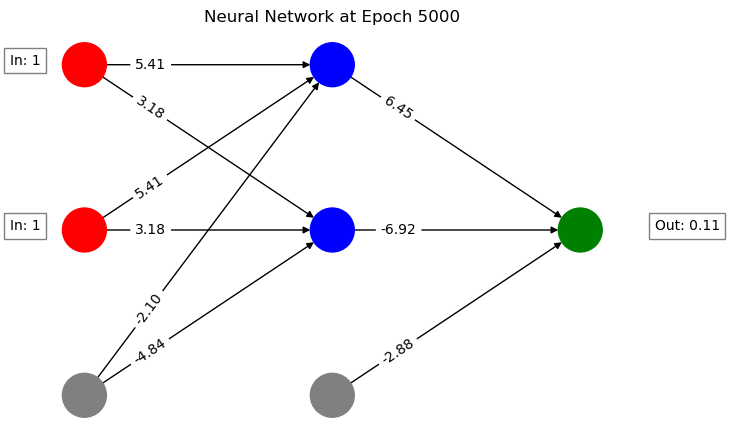


Final Network Predictions:
Input: [0 0] -> Predicted Output: 0.0515 Expected Output: [0]
Input: [0 1] -> Predicted Output: 0.9532 Expected Output: [1]
Input: [1 0] -> Predicted Output: 0.9532 Expected Output: [1]
Input: [1 1] -> Predicted Output: 0.0501 Expected Output: [0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display
import time

# Sigmoid activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Assuming x is already sigmoid output

# which xor to print results for 0 = [0,0] 1 = [0,1] 2 = [1,0] 3 = [1,1]
xor_to_look_at = 3
ploting_interval = 500 # plot after X epochs
number_of_epochs = 10000


# Initialize network parameters
input_size = 2  
hidden_size = 2  
output_size = 1  
np.random.seed(1)

# uncomment to have random weights instead of set weights
# weights_input_hidden = np.random.randn(input_size, hidden_size)
# weights_hidden_output = np.random.randn(hidden_size, output_size)

# Manually define weights instead of random 
weights_input_hidden = np.array([[1, 0], [1, 0]],dtype=float)  # 2x2 for input to hidden
weights_hidden_output = np.array([[1], [0]],dtype=float)  # 2x1 for hidden to output

# set out bias = zero to start 
bias_hidden = np.zeros((1, hidden_size)) 
bias_output = np.zeros((1, output_size))

# alpha
learning_rate = 0.1

# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Function to plot the network with different colors for each layer
def plot_network(weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, inputs, outputs, epoch):
    display.clear_output()
    G = nx.DiGraph()

    # Define node positions
    pos = {
        0: (0, 1), 1: (0, 0),  # Input layer
        2: (1, 1), 3: (1, 0),  # Hidden layer
        4: (2, 0),  # Output layer
        5: (0, -1), 6: (1, -1)  # Bias nodes for hidden and output layers
    }

    # Add nodes
    for i in range(7):
        G.add_node(i)

    # Add edges with weights
    edges = [
        (0, 2, weights_input_hidden[0, 0]), (0, 3, weights_input_hidden[0, 1]),
        (1, 2, weights_input_hidden[1, 0]), (1, 3, weights_input_hidden[1, 1]),
        (2, 4, weights_hidden_output[0, 0]), (3, 4, weights_hidden_output[1, 0]),
        (5, 2, bias_hidden[0, 0]), (5, 3, bias_hidden[0, 1]),  # Bias to hidden layer
        (6, 4, bias_output[0, 0])  # Bias to output layer
    ]
    
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    # Assign colors to nodes based on layers
    node_colors = ["red", "red", "blue", "blue", "green", "gray", "gray"]  # Bias nodes in gray

    # Draw the graph with node colors and remove node labels
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color="black", node_size=1000)

    # Add edge labels (weights)
    edge_labels = {(e[0], e[1]): f"{e[2]:.2f}" for e in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10,label_pos=0.25)

    # Add input and output values as text
    plt.text(-0.3, 1, f"In: {inputs[0]}", fontsize=10, bbox=dict(facecolor="white", alpha=0.5))
    plt.text(-0.3, 0, f"In: {inputs[1]}", fontsize=10, bbox=dict(facecolor="white", alpha=0.5))
    plt.text(2.3, 0, f"Out: {outputs.item():.2f}", fontsize=10, bbox=dict(facecolor="white", alpha=0.5))

    plt.title(f"Neural Network at Epoch {epoch}")
    plt.show()
    time.sleep(3)


loss_list = []
# Training loop
for epoch in range(number_of_epochs):
    # Forward pass
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output = sigmoid(output_input)

    # Loss (MSE)
    loss = np.mean((y - output) ** 2)
    loss_list.append(loss)

    # Backpropagation
    output_error = y - output
    output_delta = output_error * sigmoid_derivative(output)
    
    # matrix way of y-output
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
    bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    # Plot every X epochs
    if epoch % ploting_interval == 0:
        plot_network(weights_input_hidden, weights_hidden_output, bias_hidden, bias_output, X[xor_to_look_at], output[xor_to_look_at], epoch)

print("\nFinal Network Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]} -> Predicted Output: {output[i][0]:.4f} Expected Output: {y[i]}")



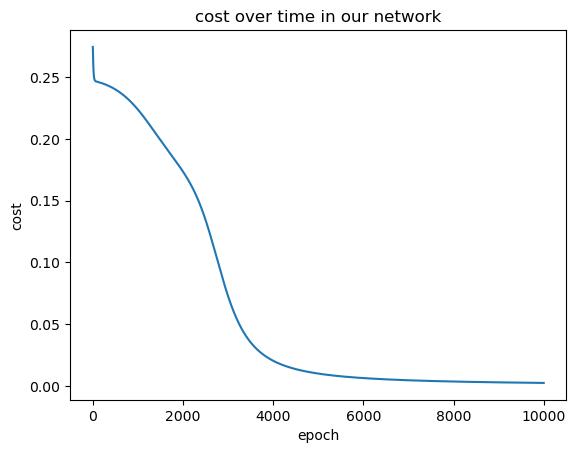

In [9]:
plt.plot(loss_list)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("cost over time in our network")
plt.show()